# 02/01/2024 Trading proyection analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("fivethirtyeight")
plt.style.use("bmh")

In [2]:
pd.read_excel("Timeline_2023.xlsx") # reading the excel file with my trading results 2023

,jan 1-6,jan 8-13,jan 15-20,jan 22-27,Jan-Febr 29-3,Feb 5-10,Feb 12-17,Feb 19-24,Feb-March 26-3,March 5-10,...,Oct 22-27,Oct-Nov 29-3,Nov 5-10,Nov 12-17,Nov 19-24,Nov-Dec 26-1,Dec 3-8,Dec 10-15,Dec 17-22,Dec 24-29
0,-0.38,-2.65,-0.12,1.76,3.88,2.82,4.29,3.61,-3.97,1.24,...,2,0.35,2,-2.42,-2.94,2.1,-5.46,2.06,2.6,2.01


In [3]:
timeline_2023 = pd.read_excel("Timeline_2023.xlsx")

We are going to transpose it to manipulate the data better with an index which will be the date or segment of days that correspond to a week of trading and a column with the results of each week. 

In [4]:
timeline_2023 = timeline_2023.T

In [5]:
timeline_2023 = timeline_2023.rename(columns = {0 : "results_week_percentage"})

In [6]:
timeline_2023.head()

,results_week_percentage
jan 1-6,-0.38
jan 8-13,-2.65
jan 15-20,-0.12
jan 22-27,1.76
Jan-Febr 29-3,3.88


**If my goal is to proyect how will be my future results in my trades this year and the following ones I need to select a sample from the data generated from the previous year 2023**

**The question is, which segment of the data from that excel do I need to take?, do I need to take it all or just a segment and in that case, which segment and why?**

**Well, when we pick a sample we need to considerate the possibility of biasness in the sample selected, in this case I must consider lost and won weeks from the time I started to apply probability theory improving the quality of my trades, the behaviour I had during this segment of the year was the same in terms of technical analysis and risk management. This was the segment of the year I had after a considerable period of losses where I lost my first prop firm account of MyForexFunds because I was applying statistical knowledge, measures of central tendency and spread badly.**

**This segment of the year results I am going to take is from the week of September 17-22 until the rest of the year 2023.**

In [7]:
population_2023 = timeline_2023.loc["Sep 17-22": , :]

In [8]:
len(population_2023) # we have 15 weeks with 15 results applying a risk management based on probability theory concepts

15

# Sampling Distribution of the Sample Mean (SDSM)

A subset of the population is called a sample, maybe we can consider that our total population of the data so far is this excel from the week of 17 of September. I am interested in predicting the events of the future **(the increase or decrease of my balance at the end of each week)** based on this sample, as predicting the features of the rest of the leaves of a tree based on the few leaves I currently have which are these 15 weeks, we can infer that the population parameter is similar to its corresponding statistic which in this case is the mean. 

We are going to take a sample of 4 results which correspond to 4 weeks, a month of trading and we are going to take all possible samples of 4 weeks inside of those 15 weeks applying **N ** n** using the itertools module.

In [9]:
import itertools

In [10]:
population = list(population_2023["results_week_percentage"])
print(list(population_2023["results_week_percentage"])) # this is my list of 15 weekly results

[2.0, 2.0, 2.0, 2.0, -0.37, 2.0, 0.35, 2.0, -2.42, -2.94, 2.1, -5.46, 2.06, 2.6, 2.01]


**We are going to plot our data distribution of those 15 week results on intervals of 4 bucks**

In [11]:
max_population = max(population)
min_population = min(population)

In [12]:
range_population = max_population - min_population
range_population # the range of the distribution is 8.06

8.06

In [13]:
range_population / 2 # this 2 is the lenght of each bin

4.03

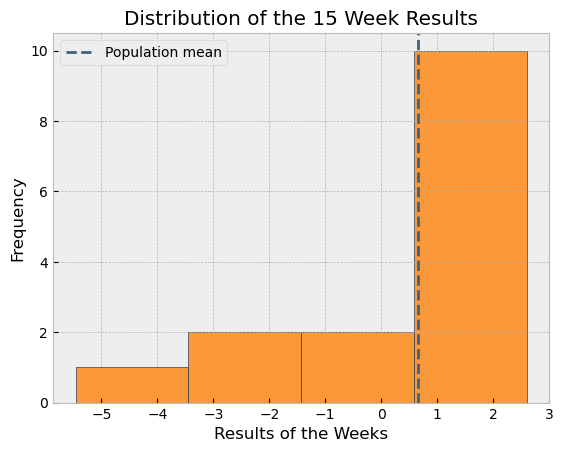

In [14]:
plt.hist(population, bins = 4, color = "#fa983a", edgecolor = "#2c3e50")
plt.title("Distribution of the 15 Week Results")
plt.ylabel("Frequency")
plt.xlabel("Results of the Weeks")
plt.axvline(np.mean(population), color = "#3c6382", label = "Population mean", linestyle = "--")
plt.legend()
plt.show()

**This distribution is not normal.**

In [15]:
sample = 4 # we are going to take a sample of 4 weekly results

In [16]:
len(list(itertools.product(population, repeat = sample))) # Here we find every possible sample with a sample size of 4 
                                                          # N ** n where N is 15 and n is 4

50625

In [17]:
all_samples = list(itertools.product(population, repeat = sample)) # transforming the samples object into a list

In [18]:
# We are going to take every mean of each sample of 4 calculated and store it into a list called SDSM
SDSM = []
SDSM_decimals = []
for i in all_samples:
    sample_mean = np.mean(list(i))
    SDSM.append(round(sample_mean)) # we are going to round the data to have integer numbers, a discrete approach
    SDSM_decimals.append(sample_mean) # here we store the mean with its decimal values to plot it into a histogram

In [19]:
maxi = np.max(SDSM)
mini = np.min(SDSM)

In [20]:
abs(maxi - mini) # this is the range of the distribution, divide this by 1 (lenght of bins) is equal to the number of bins

8

**We are going to plot the sample distribution of the sample mean (SDSM), since the distribution of the previous data is not normal and we took less than 30 sample size because we took 4, the resulting distribution will not be normal.**

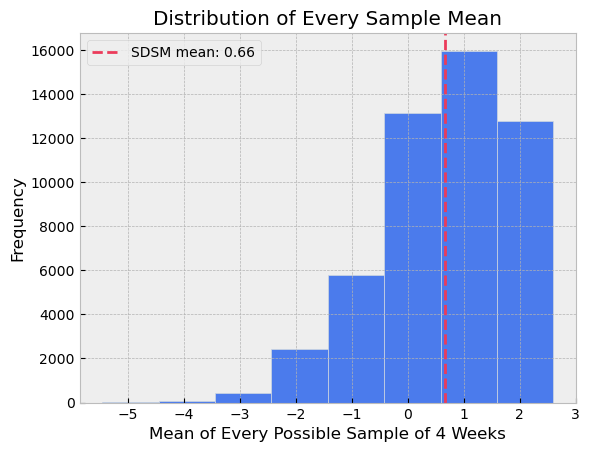

In [21]:
plt.hist(SDSM_decimals, bins = 8, color = "#4b7bec", edgecolor = "#d1d8e0")
plt.title("Distribution of Every Sample Mean")
plt.ylabel("Frequency")
plt.xlabel("Mean of Every Possible Sample of 4 Weeks")
plt.axvline(np.mean(SDSM), color = "#eb3b5a", label = f"SDSM mean: {round(np.mean(SDSM), 2)}", linestyle = "--")
plt.legend()
plt.show()

**Our data is skewed with a left tail or negatively skewed, the data of those 15 weeks is not normally distributed and we have just a few data observations not to guarantee a normal distribution with the central limit theorem (CLT).**

In [22]:
pd.Series(SDSM, name = "Results").value_counts() 

 2    15083
 1    14178
 0    14054
-1     4504
-2     2281
-3      431
-4       84
-5        9
 3        1
Name: Results, dtype: int64

In [23]:
pd.Series(SDSM, name = "Results").value_counts(normalize = True) # this is the probability distribution of the SDSM

 2    0.297936
 1    0.280059
 0    0.277610
-1    0.088968
-2    0.045057
-3    0.008514
-4    0.001659
-5    0.000178
 3    0.000020
Name: Results, dtype: float64

In [24]:
p_x = pd.Series(SDSM, name = "Results").value_counts(normalize = True) # we store this Series into a variable

**Let's plot the probability distribution of the sample mean with a bar chart.**

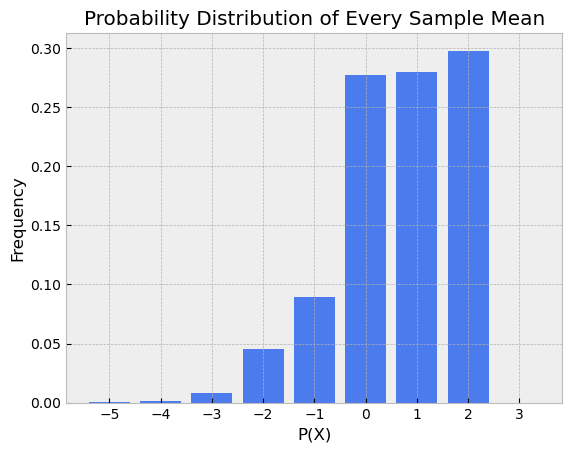

In [25]:
plt.bar(p_x.index, p_x, color = "#4b7bec")
plt.title("Probability Distribution of Every Sample Mean")
plt.ylabel("Frequency")
plt.xlabel("P(X)")
plt.xticks(p_x.index)
plt.show()

**Now let's calculate the mean and standard deviation of the probability distribution of the sample mean**

In [26]:
p_x = pd.DataFrame(p_x) # we convert this Series into a dataframe object to create a second column

**In these probability distributions we calculate the mean multiplying the value (in this case the resulted mean per sample) times its corresponding probability and we sum up all of these multiplications**

In [27]:
p_x["Multiply"] = p_x["Results"] * p_x.index

In [28]:
round(p_x["Multiply"].sum(), 2) # this is the mean of the probability distribution of the SDSM 

0.66

In [29]:
round(population_2023.mean(), 2) # this is the mean of the population

results_week_percentage    0.66
dtype: float64

**The mean of the sample distribution of the sample mean (SDSM) and the mean of the population is the same.**

In [30]:
from scipy import stats # with this module we can calculate the skewness of the data, a measure of asymetry

In [31]:
round(stats.skew(SDSM_decimals), 2) 
# We have a higly negative skew data here, because my trades move towards earning at the end of each week

-0.73

In [32]:
round(np.std(population) / np.sqrt(sample), 2) # This is the standar error of the SDSM, the deviation from the mean

1.17

We are picking more than 5% of the population in this sample size of 4 we need to apply the finite population correction factor in the standar error of the sample distribution of the sample mean. Nevertheless, we are sampling with replacement **N ** n** so we don't need to do this product. 

# Sample Distribution of the Sample Proportion (SDSP)

The proportion in our population data is the number of subjects that meet a certain condition where **p = x / n**, the condition we are going to higlight is all the data observations which resulted in **+2%** at the end of each week or more, so which is our population proportion? 

+ x = number of data observations that meet our criteria
+ n = total number of sample size whether it meets our condition or not

In [33]:
x = 0
n = len(population)
for i in population:
    if i >= 2:
        x += 1

In [34]:
p = round(x / n, 2)
p # our population proportion is 67% 

0.67

**We can apply the sample distribution of the sample proportion (SDSP) taking every possible sample of 4 weeks that meet our criteria.**

In [35]:
# We are going to take every proportion of each sample of 4 calculated and store it into a list called SDSP
SDSP = []

for samples in all_samples:
    
    x = 0
    for data_point in samples:
        
        if data_point >= 2:
            x += 1
        
    p_this_sample = x / len(samples) # this is the formula for the proportion but in this case for each sample of 4
    
    SDSP.append(p_this_sample) # we are going to append into a list the proportion of each sample

In [36]:
len(SDSP)

50625

In [37]:
len(all_samples)

50625

In [38]:
round(np.mean(SDSP), 2)

0.67

In [39]:
p

0.67

**Indeed, the mean of the SDSP is equal to the proportion p of the population, however, we can construct a probability distribution of a random variable p**

In [40]:
pd.DataFrame(SDSP).value_counts(normalize = True).sort_index()

0.00    0.012346
0.25    0.098765
0.50    0.296296
0.75    0.395062
1.00    0.197531
dtype: float64

In [41]:
p_distribution_p = pd.Series(SDSP).value_counts(normalize = True).sort_index()

In [42]:
p_distribution_p.index = ["0/4", "1/4", "2/4", "3/4", "4/4"] # We are going to change the label of the index for readability
p_distribution_p

0/4    0.012346
1/4    0.098765
2/4    0.296296
3/4    0.395062
4/4    0.197531
dtype: float64

Now we are going to take each probability and store them into a list.

In [43]:
probabilities = []
for i in p_distribution_p:
    indi_probability = round(i, 2)
    probabilities.append(indi_probability)

**We are going to plot the probability distribution of this sample proportion with a bar chart.**

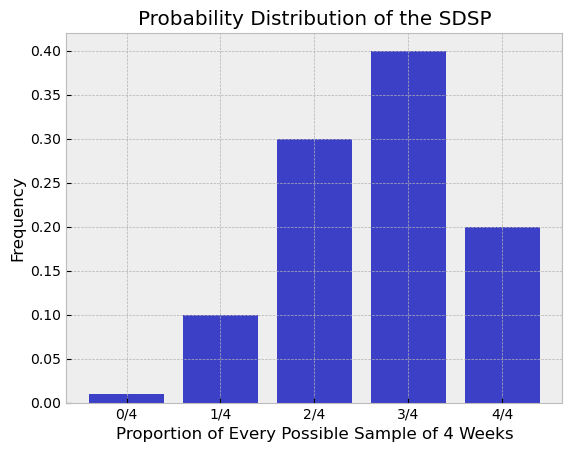

In [44]:
plt.bar(p_distribution_p.index, probabilities, color = "#3c40c6")
plt.title("Probability Distribution of the SDSP")
plt.ylabel("Frequency")
plt.xlabel("Proportion of Every Possible Sample of 4 Weeks")
plt.show()

**What is the standard deviation of this probability distribution?**

In [45]:
round(np.sqrt(p * (1 - p)) / np.sqrt(sample), 2) # This is the Standar error formula for the SDSP 

# we don't have to use the finite population correction factor if we are sampling with replacement. 

0.24

**This means that the proportion of the results of my trades at the end of each week deviates approximately 24% from the mean** 

**What is its mean?** we are going to apply the same process as in the SDSM

In [46]:
pd.Series(SDSP, name = "Results").value_counts(normalize = True).sort_index()

0.00    0.012346
0.25    0.098765
0.50    0.296296
0.75    0.395062
1.00    0.197531
Name: Results, dtype: float64

In [47]:
SDSP_df = pd.Series(SDSP, name = "Results").value_counts(normalize = True).sort_index()

In [48]:
SDSP_df = pd.DataFrame(SDSP_df)

In [49]:
SDSP_df["multiply"] = SDSP_df.index * SDSP_df["Results"]

In [50]:
SDSP_df

,Results,multiply
0.00,0.012346,0.000000
0.25,0.098765,0.024691
0.50,0.296296,0.148148
0.75,0.395062,0.296296
1.00,0.197531,0.197531


In [51]:
round(SDSP_df["multiply"].sum(), 2) #This is the mean of the SDSP which is the same as the p of the population

0.67

Can we make inferences with this distribution? What are the conditions for this?

+ Randomness: the sampling is random
+ Normal (large counts) n * p >= 5 and n * (1 - p) >= 5: Looks like we don't have a large sample
+ 10% rule: If we are sampling with replacement we don't need to worry about this

In [52]:
sample * p 

2.68

In [53]:
round(sample * (1 - p), 2)

1.32

**Since both of these products aren't bigger or equal than 5, we can't make inferences with this distribution using the central limit theorem knowledge with T and Z scores, a non parametric approach for small sample size and non normal distributions may be the best choice to make inferences on this kind of data**

# Sum of each Sample of 4 Weeks

We are going to sum every possible sample of 4 weeks from the data to see all the possible results within a month of trading, the variable all_samples contains **N ** n** posible samples 15 ** 4. 

In [54]:
sumed_samples = [] # we are going to store every statistic which is this case is the sum, here in this empty list

for sample in all_samples:
    sumed = sum(sample) # we are going to store the sum, not the mean
    sumed_samples.append(sumed)

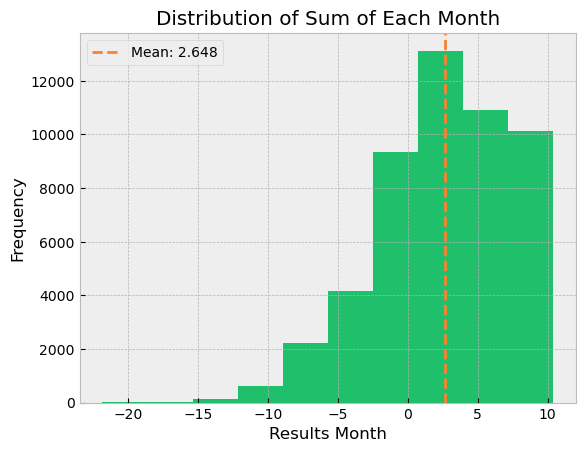

In [55]:
plt.hist(sumed_samples, color = "#20bf6b")
plt.title("Distribution of Sum of Each Month")
plt.ylabel("Frequency")
plt.xlabel("Results Month")
plt.axvline(np.mean(sumed_samples), color = "#fa8231", linestyle = "--", label = f"Mean: {np.mean(sumed_samples)}")
plt.legend()
plt.show()

**The mean is 2.64, what is the standar deviation?**

In [56]:
round(np.std(population) / np.sqrt(4), 2) # this is the standard error for this distribution, the same as the SDSM

1.17

In [57]:
round(np.std(sumed_samples), 2) # this is the standard deviation of this particular distribution of the sum of each month

4.66

**This data is left skewed, when we have skewed data it is better to use the interquartile range (IQR) as a measure of spread and the median as a measure of the centre.**

In [58]:
sumed_samples = pd.Series(sumed_samples, name = "Sumed Month") # we create a series object to manipulate the tabular data

In [59]:
round(sumed_samples.median(), 2) # the median is 3.26% 

3.26

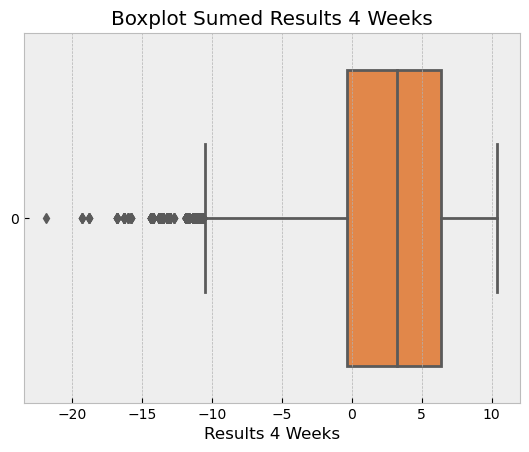

In [60]:
sns.boxplot(sumed_samples, orient = "h", color = "#fa8231")
plt.title("Boxplot Sumed Results 4 Weeks")
plt.xlabel("Results 4 Weeks")
plt.show()

In [61]:
sumed_samples.describe()

count    50625.000000
mean         2.648000
std          4.660548
min        -21.840000
25%         -0.360000
50%          3.260000
75%          6.410000
max         10.400000
Name: Sumed Month, dtype: float64

In [62]:
description = sumed_samples.describe()

In [63]:
IQR = description.loc["75%"] - description.loc["25%"] 
IQR

6.77

We have a **mean of 2.64** a **median of 3.26**. We also have a **standard deviation of 4.66**, a **standard error of 1.17** and finally an **interquartile range of 6.77**

# Proportion of the sum of each possible sample

**In a prop firm challenge we can lose no more than 10%, but what percentage of this data is less than 10%?**

In [64]:
sumed_samples = pd.Series(sumed_samples, name = "Sumed Month") # we create a series object to manipulate the tabular data

In [65]:
less_10 = sumed_samples[sumed_samples <= -10]

In [66]:
more_10 = sumed_samples[sumed_samples > -10]

In [67]:
len(less_10)

524

In [68]:
len(more_10)

50101

In [69]:
len(sumed_samples)

50625

In [70]:
len(less_10) + len(more_10)

50625

In [71]:
lenght_less_10 = len(less_10)
lenght_more_10 = len(more_10)
lenght_total = len(sumed_samples)

**We are going to find the proportion of a month of trading where we have more than -10%** 

In [72]:
round(lenght_more_10 / lenght_total, 2) # we have 99% chances of not losing a prop firm account acording to this data

0.99

In [73]:
round(lenght_less_10 / lenght_total, 2) # we have 1% chances of losing a prop firm account according to this data

0.01

**What about the proportion of earning +2% every week? +8% per month**

In [74]:
less_2 = sumed_samples[sumed_samples < 2]

In [75]:
more_2 = sumed_samples[sumed_samples >= 2]

In [76]:
lenght_less_2 = len(less_2)
lenght_more_2 = len(more_2)

In [77]:
round(lenght_more_2 / lenght_total, 2) # we have 58% chances of geeting +8% per month

0.58

In [78]:
round(lenght_less_2 / lenght_total, 2) # this is (1 - p) of getting +8%, here the probabilities are closer

0.42

# Getting a projection of a Year

In [120]:
sumed_samples = np.array(sumed_samples)

In [121]:
np.random.choice(sumed_samples, 12) # we are going to select randomly 12 months

array([ 0.69, -1.35,  8.61,  1.81,  1.15,  0.64, -4.25,  3.07,  3.98,
       -0.14,  5.63,  5.69])

In [122]:
year = np.random.choice(sumed_samples, 12) 

**We are going to plot a projection of a year, with 12 months of possible choices inside of the sumed samples of a month.** 

In [123]:
year_accumulative = list(itertools.accumulate(year)) # here we use the ogive data

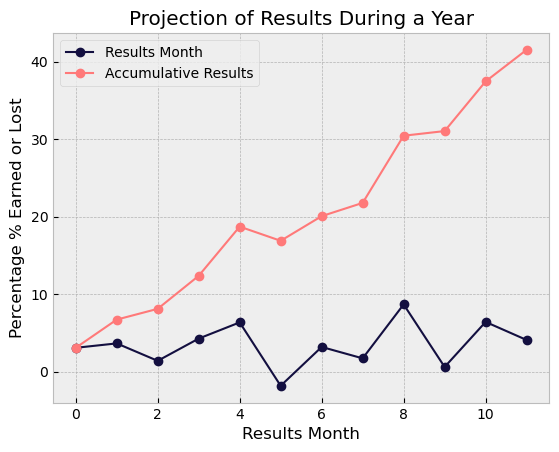

In [124]:
plt.plot(year, marker = "o", color = "#130f40", linewidth = 1.5, label = "Results Month")
plt.plot(year_accumulative, marker = "o", color = "#ff7979", linewidth = 1.5, label = "Accumulative Results")
plt.title("Projection of Results During a Year")
plt.xlabel("Results Month")
plt.ylabel("Percentage % Earned or Lost")
plt.legend()
plt.show()